<h2><center><img src="https://engineering.nyu.edu/sites/default/files/styles/content_header_default_1x/public/2020-06/yeshiva-university-katz-main-img.jpg?h=b69e0e0e&itok=PWrA3fKb" width=180 height=150 />Analytics Programming (DAV-5400) </center></h2>

<img src="https://c4.wallpaperflare.com/wallpaper/423/626/462/macro-mushroom-wallpaper-preview.jpg" width=400 height=200 />

# Project - 4 (Predictive Analysis using scikit-learn)

### Submitted By - Surbhi Nayak (snayak@mail.yu.edu)

### Objectives - 

In this project we want to analyze dataset and find Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible. After the attributes selection we are planning to build a model which can help us in future to determine mushroom is edible or not.

### Data Dictionary - 

a) **Title**: Mushroom Database


b) **Sources** (https://archive.ics.uci.edu/ml/datasets/mushroom): 


     1. Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
     2. Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
     3. Date: 27 April 1987
     

c) **Attribute Information**: (classes: edible=e, poisonous=p)


     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


* Importing all the required libraries for analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Phase-1 (Data Acquisition, Preparation, Transformation, EDA )

**Data Preparation:**

* Reading data into dataframe from github

In [2]:
df_mashroom = pd.read_csv('https://raw.githubusercontent.com/surbhinayak10/DataAnalysisProjects/main/Predictive%20Analysis%20using%20scikit-learn/agaricus-lepiota.data',header = None)
df_mashroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


* Shape of the dataset

In [3]:
print('No of the columns in dataset -',df_mashroom.shape[1])
print('No of the rows in dataset -',df_mashroom.shape[0])

No of the columns in dataset - 23
No of the rows in dataset - 8124


* Creating a subset with the columns of interest

In [4]:
# create a subset of 5 columns, including 'edible' + 'poisonous'
# using the 'copy()' function to preserve the original data frame
df_mashroom_sub = df_mashroom.iloc[:, [0, 1, 3, 5, 21, 22]].copy()
df_mashroom_sub

,0,1,3,5,21,22
0,p,x,n,p,s,u
1,e,x,y,a,n,g
2,e,b,w,l,n,m
3,p,x,w,p,s,u
4,e,x,g,n,a,g
...,...,...,...,...,...,...
8119,e,k,n,n,c,l
8120,e,x,n,n,v,l
8121,e,f,n,n,c,l
8122,p,k,n,y,v,l


* Adding meaningful column name

In [5]:
# add meaningful column names
df_mashroom_sub.columns = ['Edible', 'Cap_Shape', 'Cap_Color', 'Odor', 'Population', 'Habitat']

# sanity check
df_mashroom_sub.head(5)

,Edible,Cap_Shape,Cap_Color,Odor,Population,Habitat
0,p,x,n,p,s,u
1,e,x,y,a,n,g
2,e,b,w,l,n,m
3,p,x,w,p,s,u
4,e,x,g,n,a,g


* Replace the single letter abbreviations used in the data with more descriptive character strings and converting the “e”/”p” indicators in the first column to digits. Where, the “e” is 0 and “p” is 1

In [6]:
# Replacing “e” to 0 and “p” to 1
df_mashroom_sub.Edible.replace({'e': 0,'p':1}, inplace = True)

# replace Cap Shape col values
df_mashroom_sub.Cap_Shape.replace({'b':'bell',
                                   'c':'conical',
                                   'x':'convex',
                                   'f':'flat',
                                   'k':'knobbed',
                                   's':'sunken'}, inplace = True)

# replace Cap Color values 
df_mashroom_sub.Cap_Color.replace({'n': 'brown', 
                             'b': 'buff',
                             'c': 'cinnamon',
                             'g': 'gray',
                             'r': 'green',
                             'p': 'pink',
                             'u': 'purple',
                             'e': 'red',
                             'w': 'white',
                             'y': 'yellow'}, inplace = True)


# replace odor values 
df_mashroom_sub.Odor.replace({'a': 'almond', 
                             'l': 'anise',
                             'c': 'creosote',
                             'y': 'fishy',
                             'f': 'foul',
                             'm': 'musty',
                             'n': 'none',
                             'p': 'pungent',
                             's': 'spicy'}, inplace = True)


# replace odor values 
df_mashroom_sub.Population.replace({'a': 'abundant', 
                             'c': 'clustered',
                             'n': 'numerous',
                             's': 'scattered',
                             'v': 'several',
                             'y': 'solitary'}, inplace = True)


# replace odor values 
df_mashroom_sub.Habitat.replace({'g': 'grasses', 
                             'l': 'leaves',
                             'm': 'meadows',
                             'p': 'paths',
                             'u': 'urban',
                             'w': 'waste',
                             'd': 'woods'}, inplace = True)


# Displaying the subset with replaced values 
df_mashroom_sub.head(10)

,Edible,Cap_Shape,Cap_Color,Odor,Population,Habitat
0,1,convex,brown,pungent,scattered,urban
1,0,convex,yellow,almond,numerous,grasses
2,0,bell,white,anise,numerous,meadows
3,1,convex,white,pungent,scattered,urban
4,0,convex,gray,none,abundant,grasses
5,0,convex,yellow,almond,numerous,grasses
6,0,bell,white,almond,numerous,meadows
7,0,bell,white,anise,scattered,meadows
8,1,convex,white,pungent,several,grasses
9,0,bell,yellow,almond,scattered,meadows


**Creating Dummy Variables:**

* Creating a set of dummy variables for each of the other columns in same DataFrame 

In [7]:
feature_columns = [c for c in df_mashroom_sub.columns if not c in ('Edible')]
df_mashroom_dv = pd.get_dummies(df_mashroom_sub,columns=feature_columns, prefix=feature_columns)
df_mashroom_dv

,Edible,Cap_Shape_bell,Cap_Shape_conical,Cap_Shape_convex,Cap_Shape_flat,Cap_Shape_knobbed,Cap_Shape_sunken,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,...,Population_scattered,Population_several,Population_solitary,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


* Creating a set of dummy variables for each of the other columns in DataFrame 

In [8]:
# creating empty dict to store dataframes for each column for dummy variables 
dummy_dict = {}

# for loop for creating dummy variable for each column 
for i in df_mashroom_sub.columns:
    if i != 'Edible':
        dummy_dict[i] = pd.get_dummies(df_mashroom_sub[i])

# dipalying created dict
dummy_dict

{'Cap_Shape':       bell  conical  convex  flat  knobbed  sunken
 0        0        0       1     0        0       0
 1        0        0       1     0        0       0
 2        1        0       0     0        0       0
 3        0        0       1     0        0       0
 4        0        0       1     0        0       0
 ...    ...      ...     ...   ...      ...     ...
 8119     0        0       0     0        1       0
 8120     0        0       1     0        0       0
 8121     0        0       0     1        0       0
 8122     0        0       0     0        1       0
 8123     0        0       1     0        0       0
 
 [8124 rows x 6 columns],
 'Cap_Color':       brown  buff  cinnamon  gray  green  pink  purple  red  white  yellow
 0         1     0         0     0      0     0       0    0      0       0
 1         0     0         0     0      0     0       0    0      0       1
 2         0     0         0     0      0     0       0    0      1       0
 3         0     0

* Example how we can use as dataframe from dict

In [9]:
df_dummy_cap_shape = dummy_dict['Cap_Shape']
df_dummy_cap_shape

,bell,conical,convex,flat,knobbed,sunken
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
8119,0,0,0,0,1,0
8120,0,0,1,0,0,0
8121,0,0,0,1,0,0
8122,0,0,0,0,1,0


**Exploratory Data Analysis:**

* Missing values in dataset

In [10]:
df_mashroom_sub.isnull().sum()

Edible        0
Cap_Shape     0
Cap_Color     0
Odor          0
Population    0
Habitat       0
dtype: int64

In [11]:
df_mashroom_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edible      8124 non-null   int64 
 1   Cap_Shape   8124 non-null   object
 2   Cap_Color   8124 non-null   object
 3   Odor        8124 non-null   object
 4   Population  8124 non-null   object
 5   Habitat     8124 non-null   object
dtypes: int64(1), object(5)
memory usage: 380.9+ KB


There are none missing values present in the dataset

*  Descriptive statistics

In [12]:
for i in df_mashroom_sub.columns:
    print('Descriptive statistics for ', i, '\n')
    print(df_mashroom_sub[i].describe(),'\n')

Descriptive statistics for  Edible 

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Edible, dtype: float64 

Descriptive statistics for  Cap_Shape 

count       8124
unique         6
top       convex
freq        3656
Name: Cap_Shape, dtype: object 

Descriptive statistics for  Cap_Color 

count      8124
unique       10
top       brown
freq       2284
Name: Cap_Color, dtype: object 

Descriptive statistics for  Odor 

count     8124
unique       9
top       none
freq      3528
Name: Odor, dtype: object 

Descriptive statistics for  Population 

count        8124
unique          6
top       several
freq         4040
Name: Population, dtype: object 

Descriptive statistics for  Habitat 

count      8124
unique        7
top       woods
freq       3148
Name: Habitat, dtype: object 



* Frequency distribution of each column 

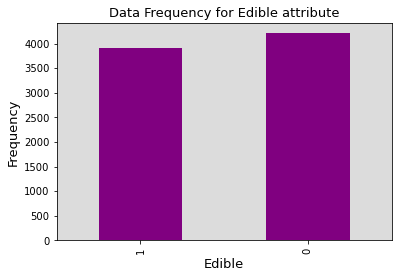

0 has highest frequency and it's total count is 4208 

------------------------------------------------------------


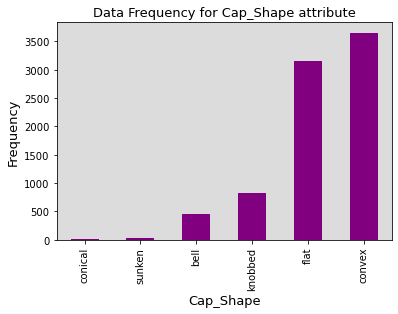

convex has highest frequency and it's total count is 3656 

------------------------------------------------------------


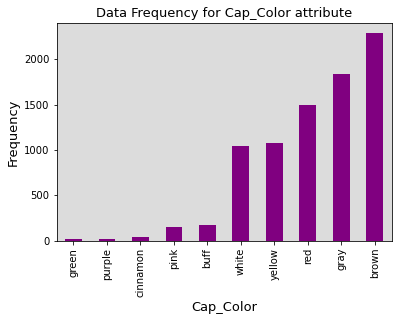

brown has highest frequency and it's total count is 2284 

------------------------------------------------------------


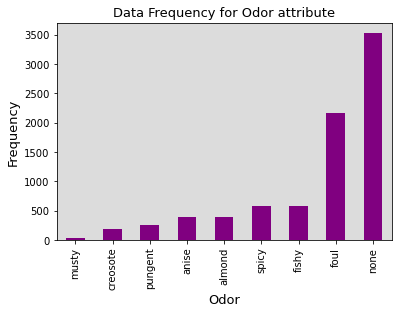

none has highest frequency and it's total count is 3528 

------------------------------------------------------------


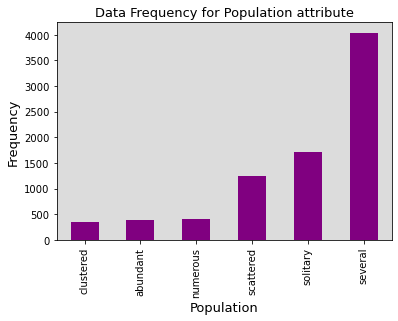

several has highest frequency and it's total count is 4040 

------------------------------------------------------------


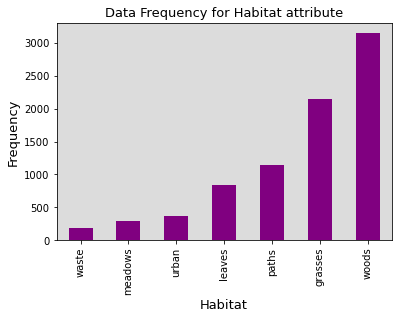

woods has highest frequency and it's total count is 3148 

------------------------------------------------------------


In [13]:
for i in df_mashroom_sub.columns:
    ax = plt.axes()
    ax.set_facecolor("gainsboro") # setting the plot background
    df_mashroom_sub[i].value_counts().sort_values().plot(kind ='bar', color = 'purple', width = 0.5)
    plt.ylabel('Frequency',fontsize=13) #xlable
    plt.xlabel(i,fontsize=13) #ylable
    plt.title('Data Frequency for '+ i +' attribute',fontsize=13)
    plt.show()
    print(df_mashroom_sub[i].value_counts().idxmax(),"has highest frequency and it's total count is",df_mashroom_sub[i].value_counts().max(),'\n')
    print('------------------------------------------------------------')

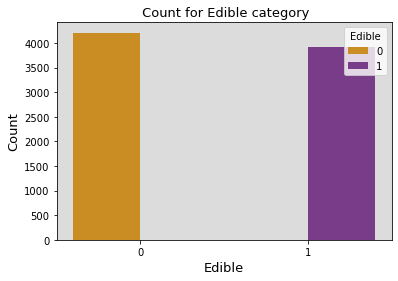

------------------------------------------------------------


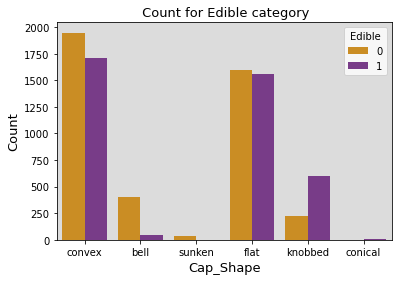

------------------------------------------------------------


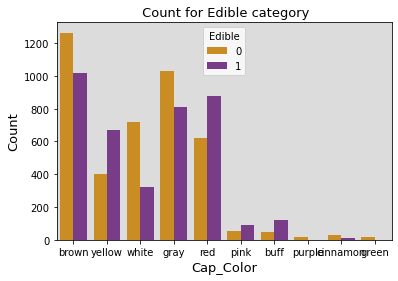

------------------------------------------------------------


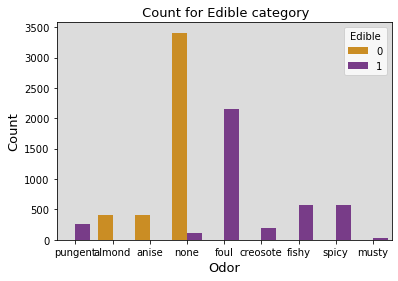

------------------------------------------------------------


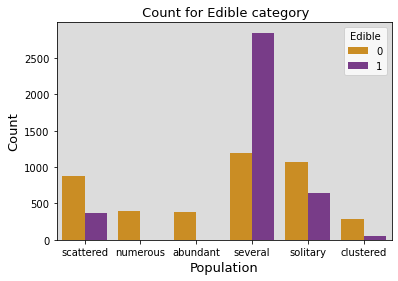

------------------------------------------------------------


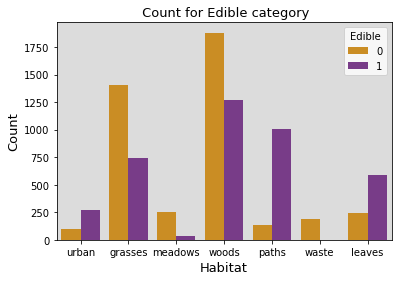

------------------------------------------------------------


In [14]:
for i in df_mashroom_sub.columns:
    ax = plt.axes()
    ax.set_facecolor("gainsboro") # setting the plot background
    sns.countplot(x=i, hue="Edible", data=df_mashroom_sub, palette = 'CMRmap_r');
    plt.ylabel('Count',fontsize=13) #xlable
    plt.xlabel(i,fontsize=13) #ylable
    plt.title(' Count for Edible category',fontsize=13)
    plt.show()
    print('------------------------------------------------------------')

From above plots we can observe the followings:

* In dataset we have more observations for edible then poisonous.
* For cap_shape attribute maximum observations are for convex and flat. bell cap_shape maximum observations are for edible.
* In cap_color column brown, white and gray has more observation for edible but yellow red and pink has more observations for poisonous.
* From odor bar graph we can conclude that poisonous mushroom has bad small like foul, fishy, spicy, musty. On other hand edible has good smell like almond, anise.
* Mostly edible mushrooms are in numerous, abundant and scattered population but poisonous mushrooms are come under several. 
* In habitat plot, for grasses, waste and woods has more edible observations but paths, leaves and urban has more poisonous mushroom observations.

**Attributes co-relation:**

In [15]:
# Convert other categorical features to numerical values
df_mashroom_cat = pd.DataFrame({col: df_mashroom_sub[col].astype('category').cat.codes for col in df_mashroom_sub}, index=df_mashroom_sub.index)
df_mashroom_cat.head()

,Edible,Cap_Shape,Cap_Color,Odor,Population,Habitat
0,1,2,0,7,3,4
1,0,2,9,0,2,0
2,0,0,8,1,2,2
3,1,2,8,7,3,4
4,0,2,3,6,0,0


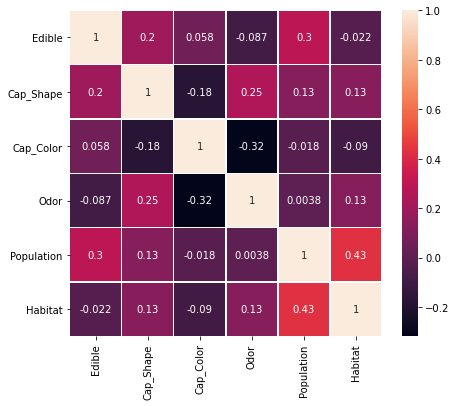

In [16]:
# use heatmap to see the correlation between the other columns and edible column
corr = df_mashroom_cat.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr,linewidths = 0.5, annot = True);

From the above heatmap, we can find strong relationship between habitat, odor, population with edible attribute therefore with habitat, odor, population attributes can help to predict that mushroom is edible or not. 

### Phase - 2  (Predictive Modeling)

* Percentage of edible mushroom observations

In [17]:
df_mashroom_sub[df_mashroom_sub['Edible']== 0].count()/df_mashroom_sub.shape[0]*100

Edible        51.797144
Cap_Shape     51.797144
Cap_Color     51.797144
Odor          51.797144
Population    51.797144
Habitat       51.797144
dtype: float64

* Here  we will use dummy variables which we created earlier for logestic regression
* then we will create a test and train data
* after that will fit train data in logestic model 
* at last we will find the accuracy for each attribute 

In [18]:
# Y is response variable
y = df_mashroom_sub['Edible']
train_socre = {}
test_score = {}
feature_corr = {}
for i in dummy_dict:
    df_i = dummy_dict[i] # explanatory variables
    scaler = StandardScaler()
    df_c = pd.DataFrame(scaler.fit_transform(df_i), columns=df_i.columns)
    
    #splitting the data as 'training data' and 'testing data' for each attribute:
    i_train, i_test, y_train, y_test = train_test_split(df_c, y, train_size=0.8)
    
    # fit the logistic regression with training dataset
    log_model = LogisticRegression()
    log_model.fit(i_train, y_train)
    
    #accuracy of each model relative to the training dataset
    train_socre[i] = round(log_model.score(i_train, y_train)*100,3)
    test_score[i] = round(log_model.score(i_test, y_test)*100,3)
    
    feature_corr[i] = log_model.fit(i_train, y_train).coef_

print('Train socre in percentage for attributes are:','\n')
print(train_socre, '\n')
print('Test socre in percentage for attributes are:','\n')
print(test_score)

Train socre in percentage for attributes are: 

{'Cap_Shape': 56.055, 'Cap_Color': 59.301, 'Odor': 98.461, 'Population': 71.642, 'Habitat': 68.441} 

Test socre in percentage for attributes are: 

{'Cap_Shape': 57.908, 'Cap_Color': 60.431, 'Odor': 98.769, 'Population': 74.338, 'Habitat': 71.385}


* Co-relation value for each model

In [19]:
for i in feature_corr:
    print(i,':', feature_corr[i],'\n')
    print('-----------------------------------')

Cap_Shape : [[-0.46507368  0.15646702  0.00997531  0.05384125  0.32514808 -0.42206562]] 

-----------------------------------
Cap_Color : [[-0.05397599  0.13071579 -0.05608247 -0.05989508 -0.30081029  0.06342808
  -0.29679549  0.16251314 -0.25088652  0.21788647]] 

-----------------------------------
Odor : [[-1.85563801 -1.85979717  0.79702962  1.35642575  2.42781926  0.35211071
  -2.56508922  0.91804091  1.36252475]] 

-----------------------------------
Population : [[-1.27695807 -0.12360883 -1.30338693  0.0504375   0.92892508  0.23317822]] 

-----------------------------------
Habitat : [[-0.21739676  0.29154831 -0.35264408  0.70963788  0.22386985 -1.02901505
  -0.13127402]] 

-----------------------------------


* Creating a dataframe for each attribute with accuracy score 

In [20]:
score = {}
for i in train_socre:
    score[i] = [train_socre[i], test_score[i]]
score

# Creating dataframe 
df_score = pd.DataFrame(score, index=["Train_score (%)","Test_score (%)"])
df_score.T.sort_values("Train_score (%)", ascending = False )

,Train_score (%),Test_score (%)
Odor,98.461,98.769
Population,71.642,74.338
Habitat,68.441,71.385
Cap_Color,59.301,60.431
Cap_Shape,56.055,57.908


* From above dataframe we can observe that odor has highest accuracy for both train and test datasets, then population and habitat. Cap_shape has the least accuracy score.

* Creating logestic regression model with all attributes

In [21]:
# X is explanatory variables, Y is response variable
y = df_mashroom_sub['Edible']
x = df_mashroom_dv

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,Edible,Cap_Shape_bell,Cap_Shape_conical,Cap_Shape_convex,Cap_Shape_flat,Cap_Shape_knobbed,Cap_Shape_sunken,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,...,Population_scattered,Population_several,Population_solitary,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1.036613,-0.242725,-0.022195,1.105487,-0.79621,-0.336878,-0.062885,1.599036,-0.145314,-0.073794,...,2.347257,-0.994599,-0.51672,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582,-0.795385
1,-0.964680,-0.242725,-0.022195,1.105487,-0.79621,-0.336878,-0.062885,-0.625377,-0.145314,-0.073794,...,-0.426029,-0.994599,-0.51672,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385
2,-0.964680,4.119885,-0.022195,-0.904579,-0.79621,-0.336878,-0.062885,-0.625377,-0.145314,-0.073794,...,-0.426029,-0.994599,-0.51672,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582,-0.795385
3,1.036613,-0.242725,-0.022195,1.105487,-0.79621,-0.336878,-0.062885,-0.625377,-0.145314,-0.073794,...,2.347257,-0.994599,-0.51672,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582,-0.795385
4,-0.964680,-0.242725,-0.022195,1.105487,-0.79621,-0.336878,-0.062885,-0.625377,-0.145314,-0.073794,...,-0.426029,-0.994599,-0.51672,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.964680,-0.242725,-0.022195,-0.904579,-0.79621,2.968433,-0.062885,1.599036,-0.145314,-0.073794,...,-0.426029,-0.994599,-0.51672,-0.599531,2.960477,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385
8120,-0.964680,-0.242725,-0.022195,1.105487,-0.79621,-0.336878,-0.062885,1.599036,-0.145314,-0.073794,...,-0.426029,1.005431,-0.51672,-0.599531,2.960477,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385
8121,-0.964680,-0.242725,-0.022195,-0.904579,1.25595,-0.336878,-0.062885,1.599036,-0.145314,-0.073794,...,-0.426029,-0.994599,-0.51672,-0.599531,2.960477,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385
8122,1.036613,-0.242725,-0.022195,-0.904579,-0.79621,2.968433,-0.062885,1.599036,-0.145314,-0.073794,...,-0.426029,1.005431,-0.51672,-0.599531,2.960477,-0.193088,-0.404842,-0.217824,-0.155582,-0.795385


* splitting the data as 'training data' and 'testing data' for each attribute

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

* fit the logistic regression model

In [23]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

* Accuracy score of regression model for both test and train datasets

In [24]:
print("Logistic Regression model accuracy for train dataset:",log_model.score(X_train, y_train)*100, '%')
print("Logistic Regression model accuracy for test dataset:",log_model.score(X_test, y_test)*100, '%')

Logistic Regression model accuracy for train dataset: 100.0 %
Logistic Regression model accuracy for test dataset: 100.0 %


We can observe that for all the attributes together logistic regression model has 100% accuracy.

### Conclusion - 

* We can conclude that odor attribute has highest accuracy to predict mushroom edibility.
* If we create logistic regression model with used attribute in the analysis we can achieve a best predictive model for mushroom edibility.
* Population and habitat attribute also can be helpful for prediction of mushroom edibility.
* Mushrooms with good smell, numerous and abundant population, also mushrooms that grew in woods, grasses, meadows, and waste are mostly edible.
* Also selected attribute from the dataset can help to predict mushrooms edibility because accuracy score is greater then  51.7971% which is total percentage of edible mushroom in dataset.

#### References:

1. https://mode.com/python-tutorial/counting-and-plotting-in-python/ 
2. https://www.datacamp.com/community/tutorials/categorical-data 
3. https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/
4. https://machinelearningmastery.com/an-introduction-to-feature-selection/
5. https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb